# Iris dataset - Visualisations
This notebook contains visualisation of the Iris dataset and analysis of those visualisations

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

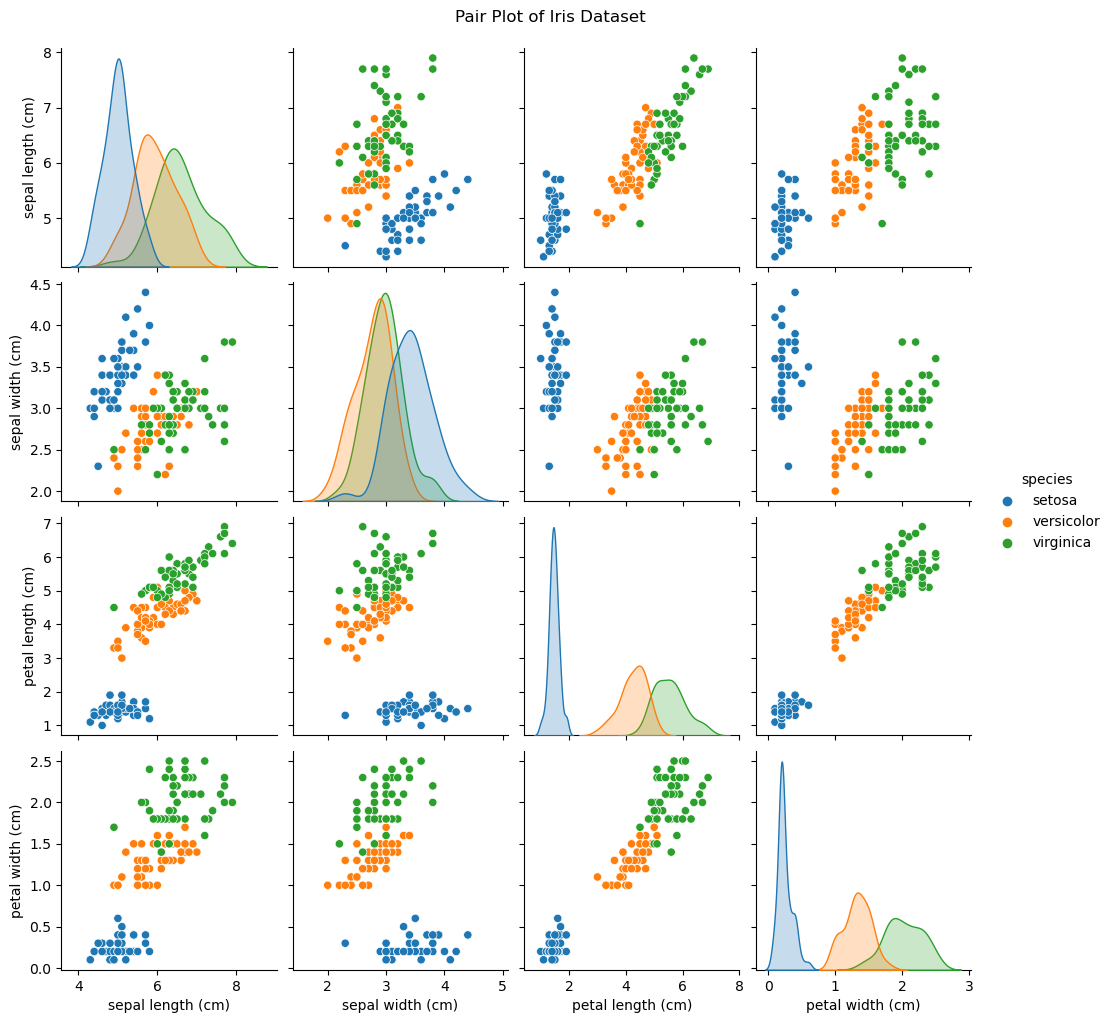

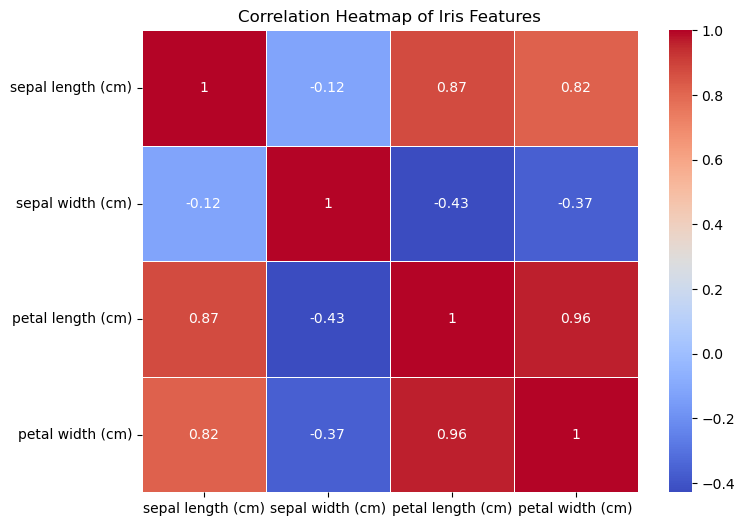

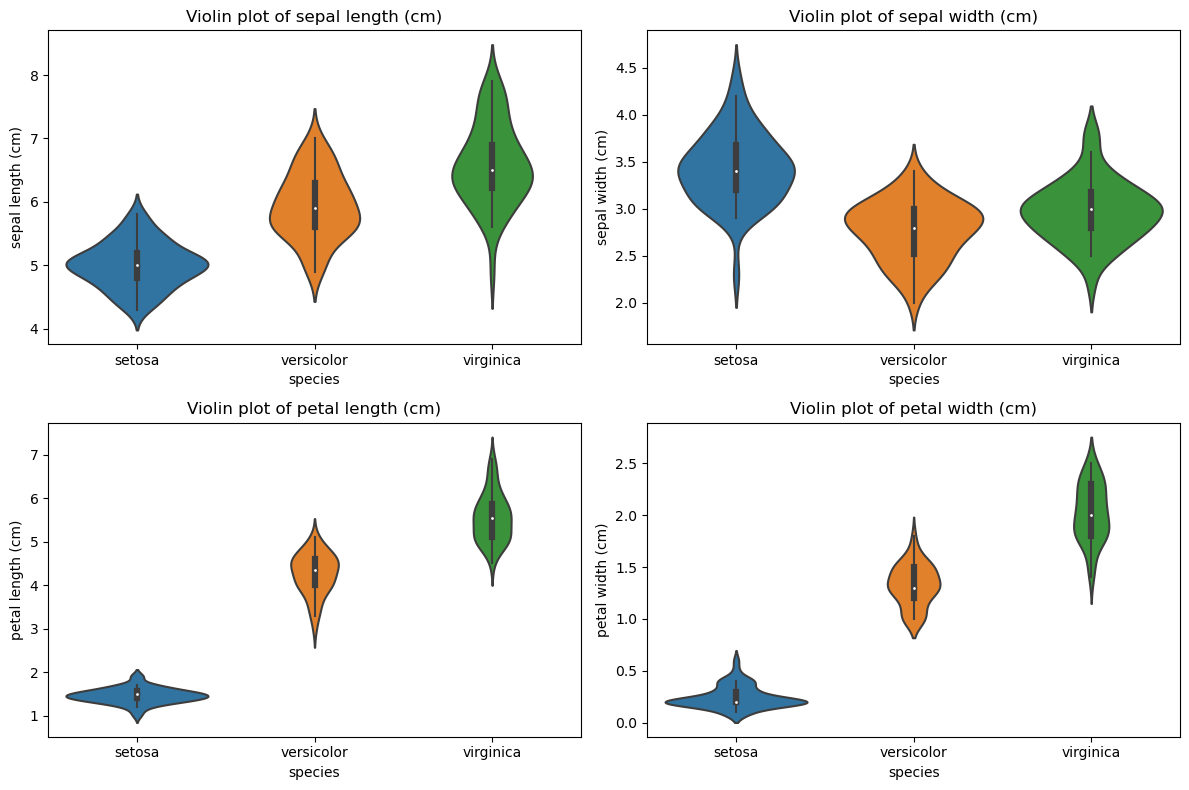

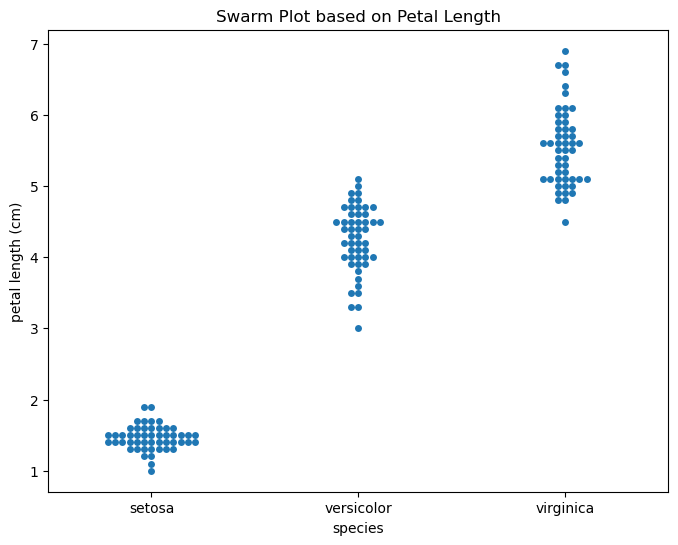

In [1]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load the dataset
from sklearn.datasets import load_iris

iris_data = load_iris()
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df['species'] = [iris_data.target_names[i] for i in iris_data.target]


#### Pair Plot

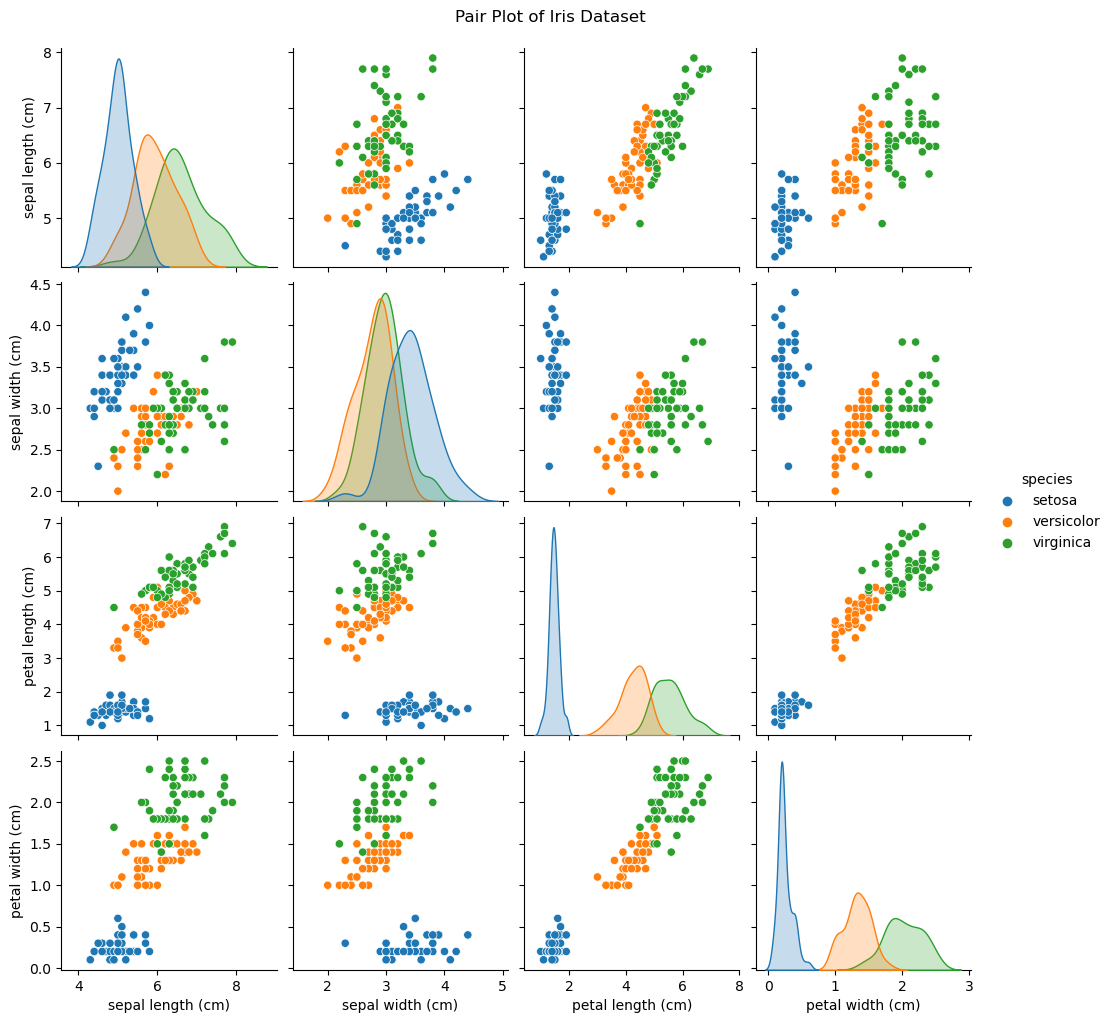

In [3]:
#Pair plot
sns.pairplot(df, hue='species')
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.show()

Analysis: 

The pair plot gives a pairwise relationship for each pair of features. The diagonal shows the distribution of a single feature using a histogram. Off-diagonal elements showcase scatter plots between two features.

For the Iris dataset, we observe a clear separation between the setosa species and the other two (versicolor and virginica) based on features like petal length and petal width. Versicolor and virginica, however, show some overlap.

#### Correlation heatmap

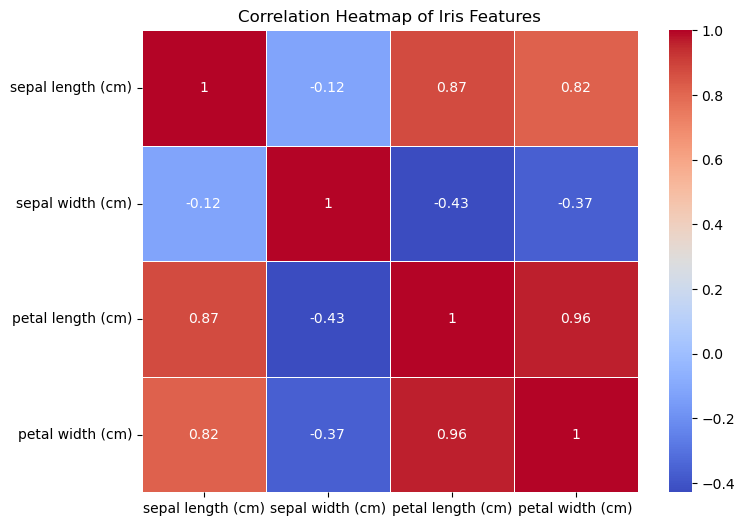

In [4]:
#Correlation heatmap
correlation_matrix = df.drop('species', axis=1).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Iris Features')
plt.show()

Analysis: 

This heatmap visualises the correlation between the dataset's different features. The closer the color is to red, the higher the positive correlation, while the closer the color is to blue, the higher the negative correlation.

In the Iris dataset, we find a strong positive correlation between petal length and petal width. Conversely, there's a negative correlation between petal length and sepal width.

#### Violin Plots

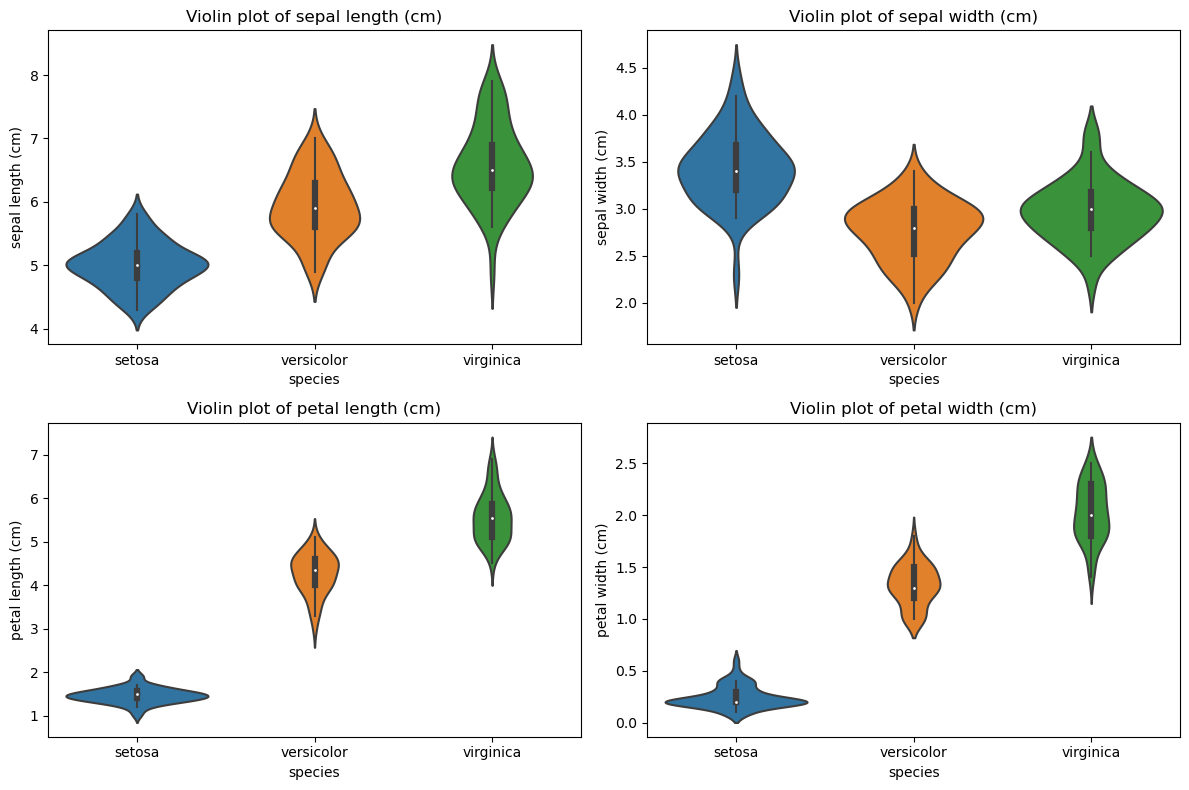

In [5]:
#Violin plots for distribution based on species
features = iris_data.feature_names
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x='species', y=feature, data=df)
    plt.title(f'Violin plot of {feature}')

plt.tight_layout()
plt.show()

Analysis: 

The violin plot displays a combination of a box plot and a KDE plot. It provides insights about the distribution of data and its probability density.

For the Iris dataset, setosa exhibits shorter petal lengths and widths than the other two species, making it distinct. The distribution of petal lengths and widths for versicolor and virginica show some overlap, with virginica tending to have larger values.

#### Swarm Plot

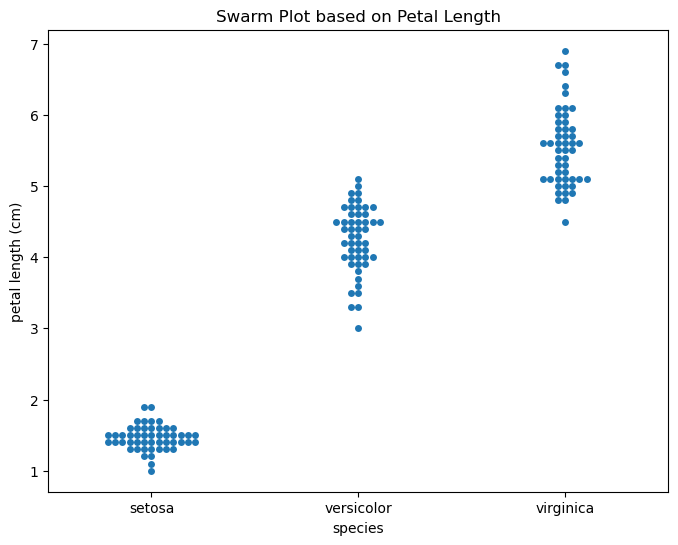

In [6]:
#Swarm plot to see distribution and overlaps
plt.figure(figsize=(8, 6))
sns.swarmplot(x='species', y='petal length (cm)', data=df)
plt.title('Swarm Plot based on Petal Length')
plt.show()

Analysis: 

Swarm plots show the distribution of data points without overlapping, giving a sense of the density of the data points.

In the case of the Iris dataset, you can visually distinguish setosa based on petal length. However, there is some overlap between versicolor and virginica, indicating similarities between these species for the chosen feature.

#### KDE Plot

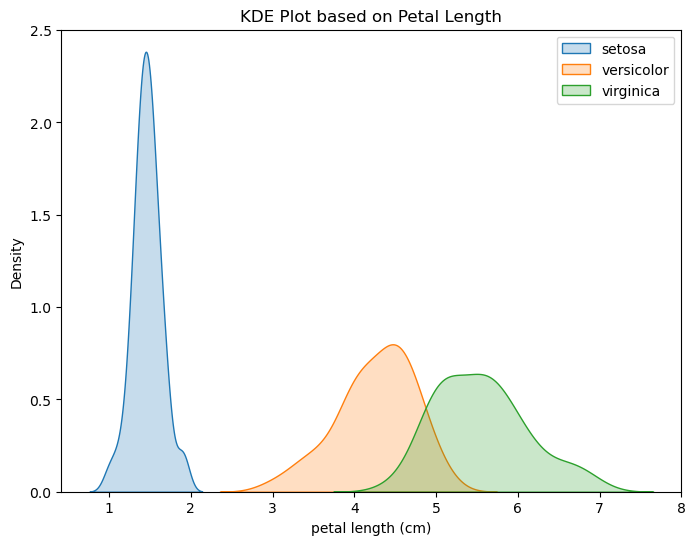

In [8]:
#KDE Plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df[df['species'] == 'setosa'], x="petal length (cm)", label="setosa", fill=True)
sns.kdeplot(data=df[df['species'] == 'versicolor'], x="petal length (cm)", label="versicolor", fill=True)
sns.kdeplot(data=df[df['species'] == 'virginica'], x="petal length (cm)", label="virginica", fill=True)
plt.title('KDE Plot based on Petal Length')
plt.legend()
plt.show()


Analysis: 

KDE plots visualise data distribution and give insights about the probability density of the data.

For the Iris dataset, the KDE plot for petal length highlights the setosa species as having distinctly smaller petal lengths. Versicolor generally has medium petal lengths, and virginica has the longest.

#### Joint Plot

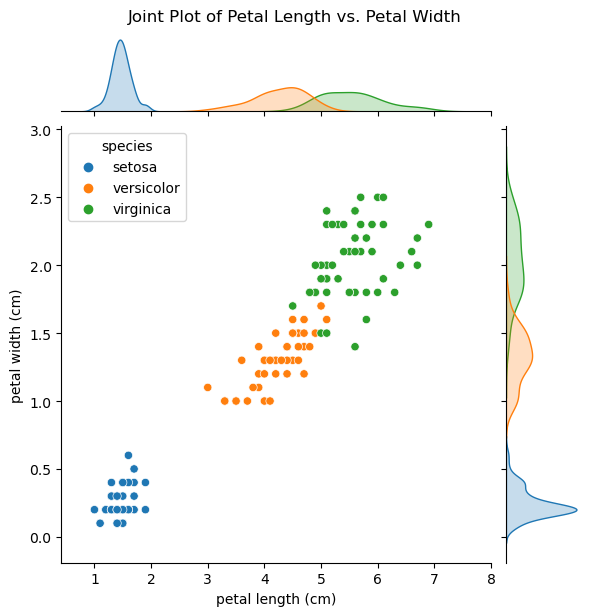

In [9]:
#Joint Plot
sns.jointplot(data=df, x="petal length (cm)", y="petal width (cm)", hue="species", kind="scatter")
plt.suptitle('Joint Plot of Petal Length vs. Petal Width', y=1.02)
plt.show()

Analysis: 

Joint plots are bivariate scatter plots with univariate histograms in the margins. They can give insights into the correlation between two features.

In the Iris dataset, the joint plot for petal length vs. petal width showcases a clear positive correlation: as petal length increases, the petal width also tends to increase. Also, setosa, with smaller petals, is distinctly separate from the other two species.

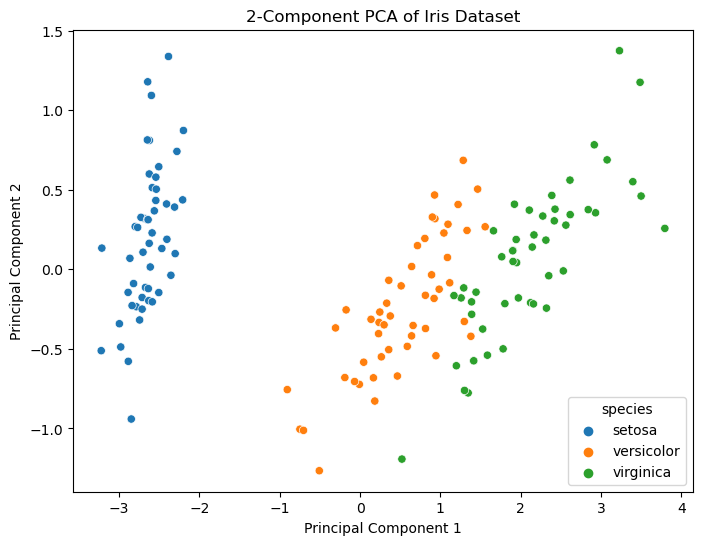

Explained Variance by PCA Components: [0.92461872 0.05306648]


In [10]:
#PCA for Dimension Reduction and Visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df.drop('species', axis=1))
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
principal_df['species'] = df['species']

plt.figure(figsize=(8, 6))
sns.scatterplot(data=principal_df, x="Principal Component 1", y="Principal Component 2", hue="species")
plt.title('2-Component PCA of Iris Dataset')
plt.show()

print(f"Explained Variance by PCA Components: {pca.explained_variance_ratio_}")



Analysis: 

PCA transforms the original features into a set of linearly uncorrelated features called principal components. The 2D scatter plot displays data points based on the first two principal components.

From the visualisation, we see setosa distinctly separated from the other two species. There is some slight overlap between versicolor and virginica, but the PCA plot helps in visualising the high-dimensional data in 2D space.

The explained variance by the PCA components provides a measure of how much information (variance) is captured by each component. A high value for the first component, for example, indicates that this component retains most of the original data's variance.